# Exploring results (Jacobians) - Retest

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
paramtype = 'Jacobians'
analysis_name='dm_%s_noventvol'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20170109/', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/%s.xls'%analysis_name
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/SPM.mat']


In [3]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_Jacobians_noventvol.xls looking up column Jacobians ...
Analysis name: dm_Jacobians_noventvol
First column: Jacobians
Columns in the model: [u'Apoe2-3', u'Apoe2-4', u'Apoe3-3', u'Apoe3-4', u'Apoe4-4', u'age23', u'age24', u'age33', u'age34', u'age44', u'agesq23', u'agesq24', u'agesq33', u'agesq34', u'agesq44', u'gender', u'educyears']
Analysis name: dm_Jacobians_noventvol
Scans (514): [u'/home/grg/spm/Jacobians/s6j_t1_10070.nii', u'/home/grg/spm/Jacobians/s6j_t1_10102.nii', u'/home/grg/spm/Jacobians/s6j_t1_10108.nii', u'/home/grg/spm/Jacobians/s6j_t1_10235.nii', u'/home/grg/spm/Jacobians/s6j_t1_10365.nii', u'/home/grg/spm/Jacobians/s6j_t1_10419.nii', u'/home/grg/spm/Jacobians/s6j_t1_10463.nii', u'/home/grg/spm/Jacobians/s6j_t1_10530.nii', u'/home/grg/spm/Jacobians/s6j_t1_10551.nii', u'/home/grg/spm/Jacobians/s6j_t1_10563.nii', u'/home/grg/spm/Jacobians/s6j_t1_10576.nii', u'/home/grg/spm/Jacobians/s6j_t1_10630.nii', u'/home/grg/spm/Jacobians/s6j_t1_1066

NameError: name 'pd' is not defined

/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0006.nii
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0007.nii
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0008.nii
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0009.nii
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0010.nii
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0011.nii


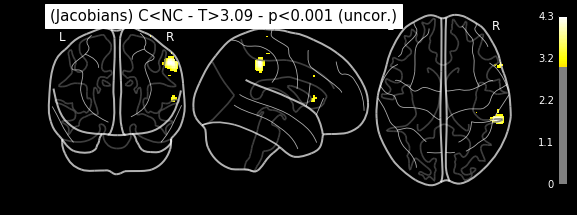

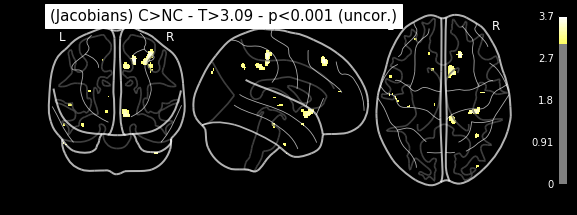

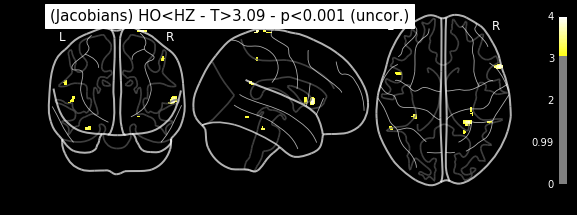

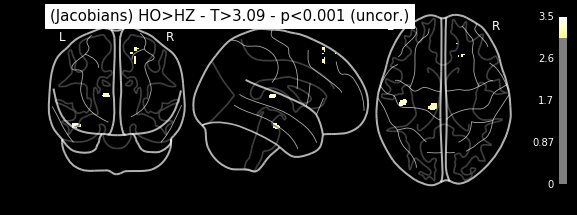

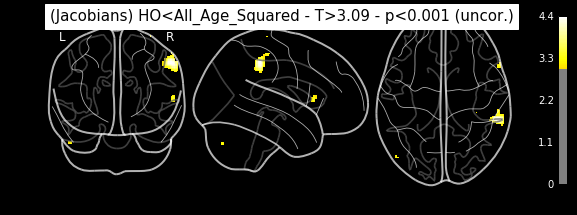

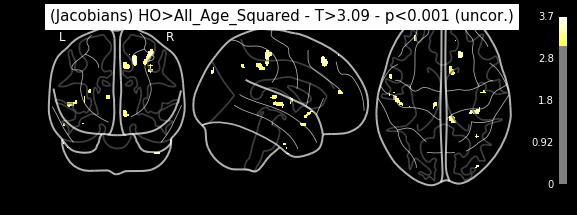

In [4]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)
    plotting.plot_glass_brain(thresholded_map1,
                      title='(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0006.nii
Saving to... /tmp/tmp2BcoIf.png
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0007.nii
Saving to... /tmp/tmpuI5VBx.png
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0008.nii
Saving to... /tmp/tmpO4cDSW.png
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0009.nii
Saving to... /tmp/tmpfRJyGB.png
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0010.nii
Saving to... /tmp/tmpMGFg_L.png
/home/grg/spm/analysis_20170109/dm_Jacobians_noventvol/estimatecontrasts/spmT_0011.nii
Saving to... /tmp/tmp50HOAG.png


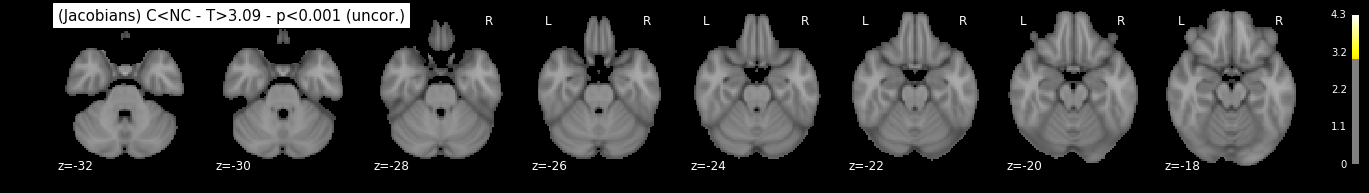

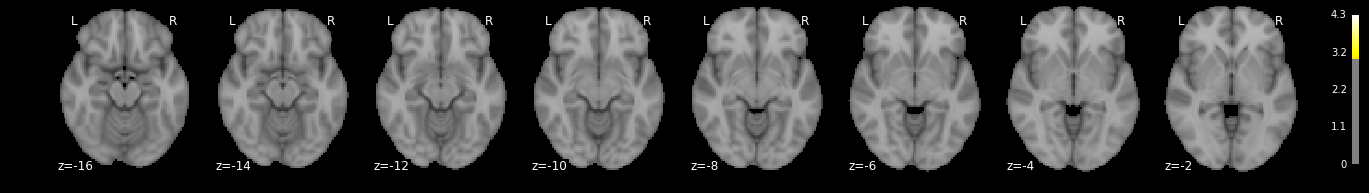

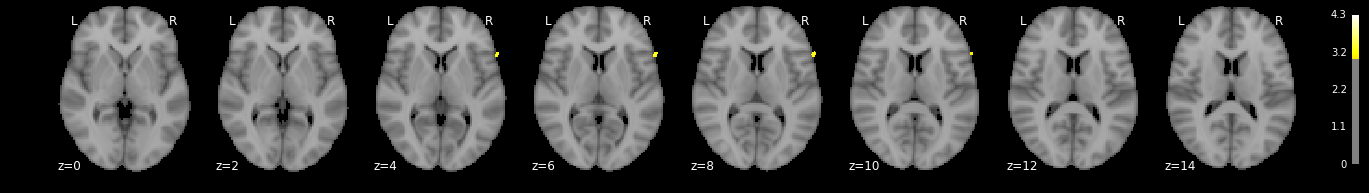

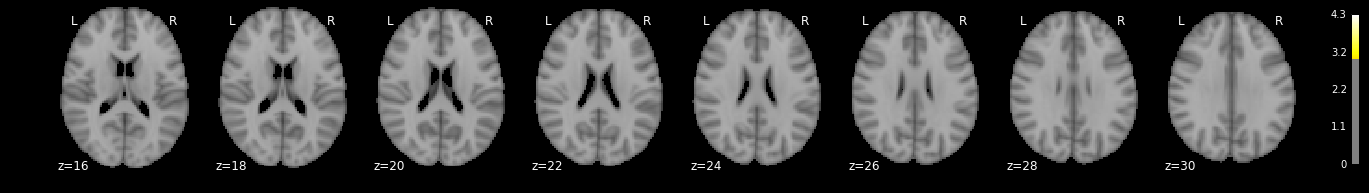

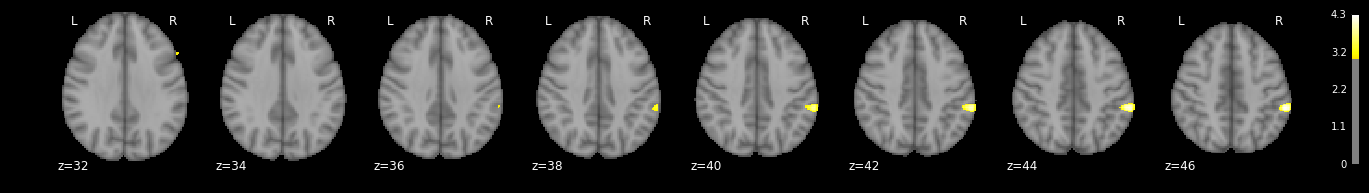

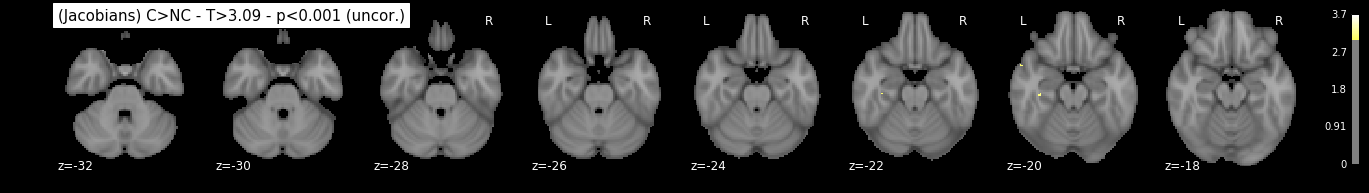

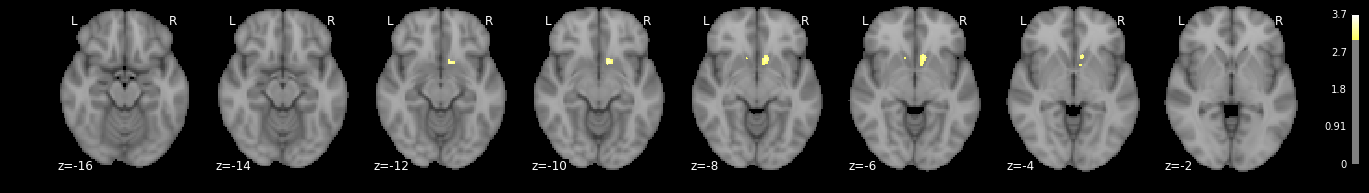

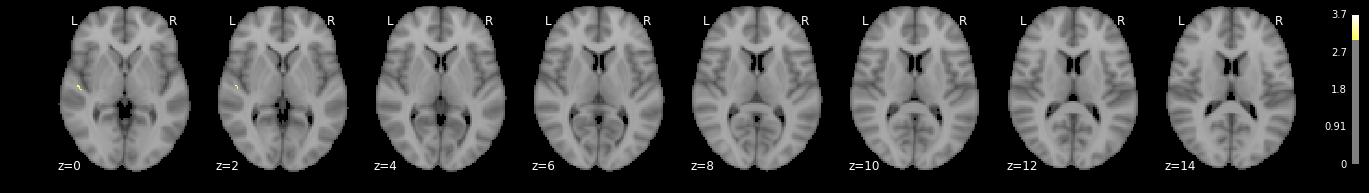

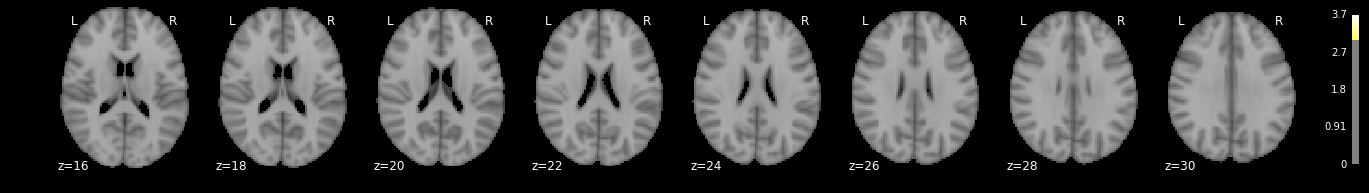

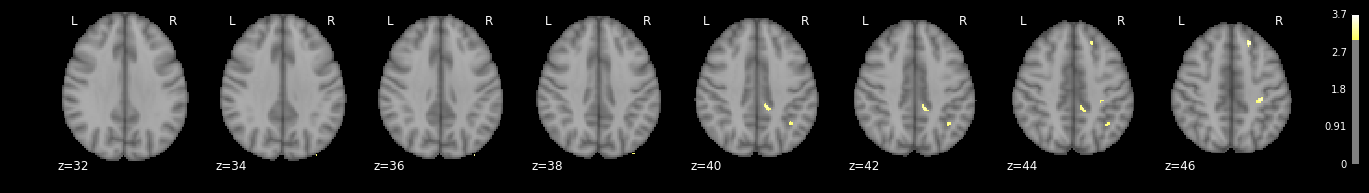

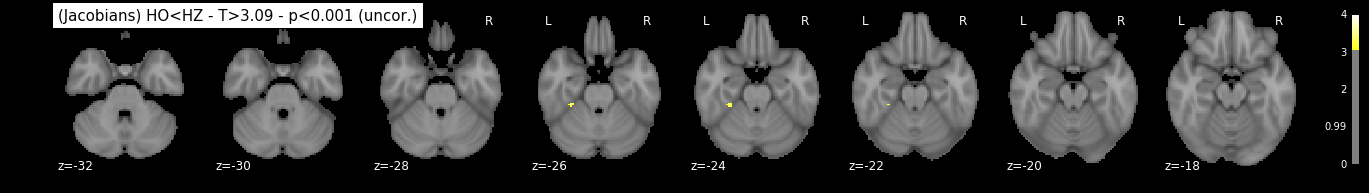

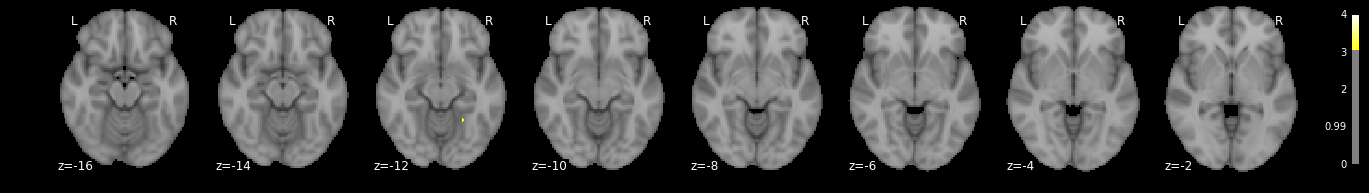

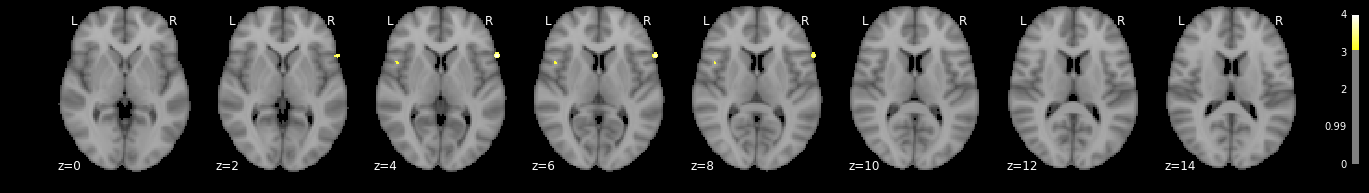

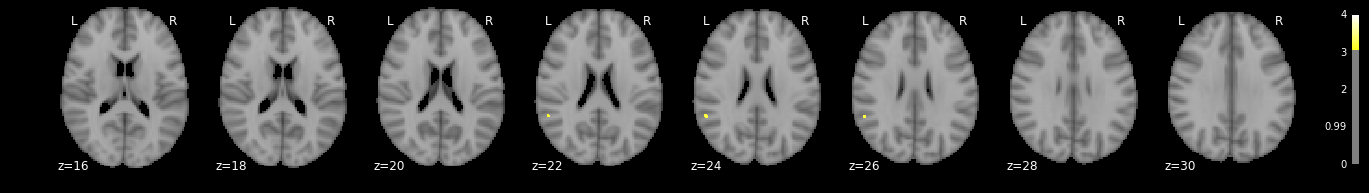

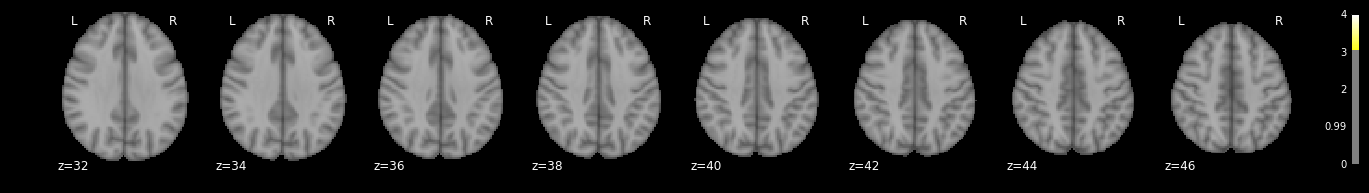

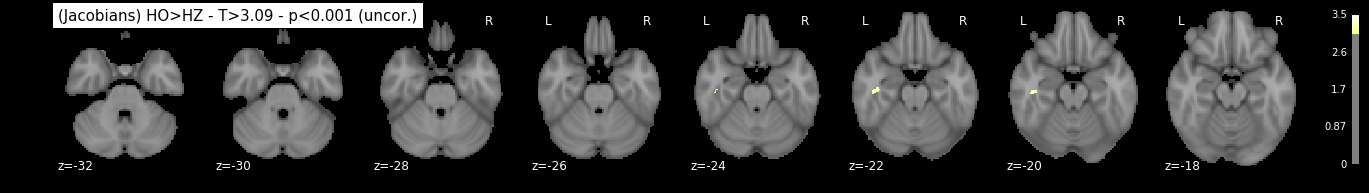

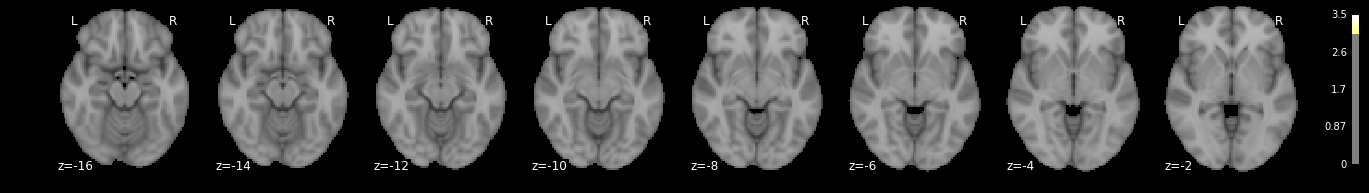

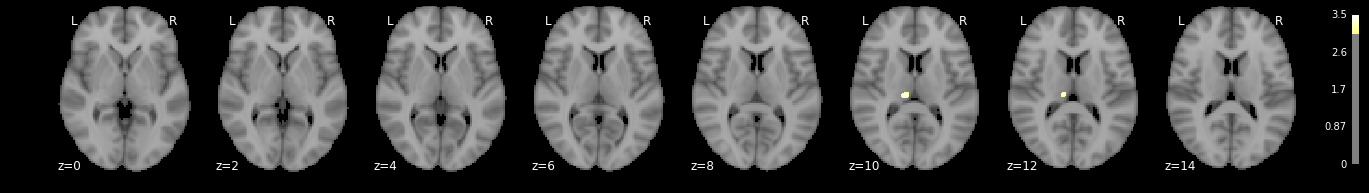

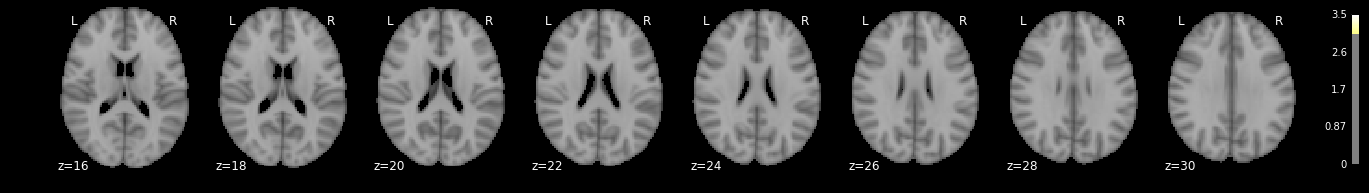

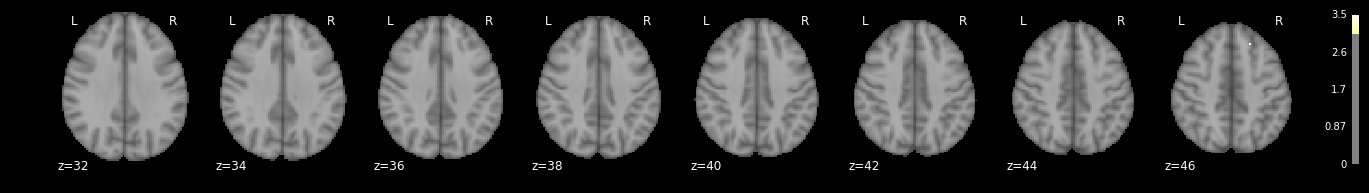

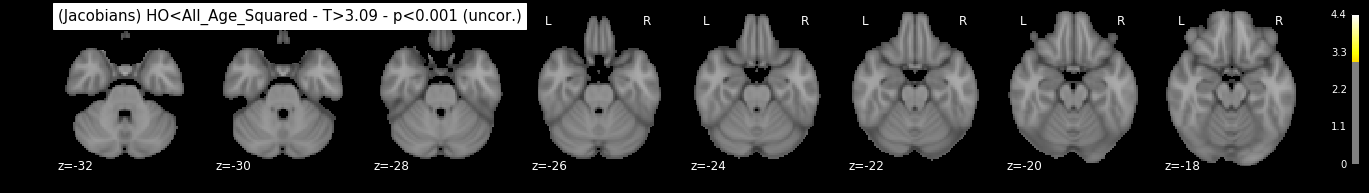

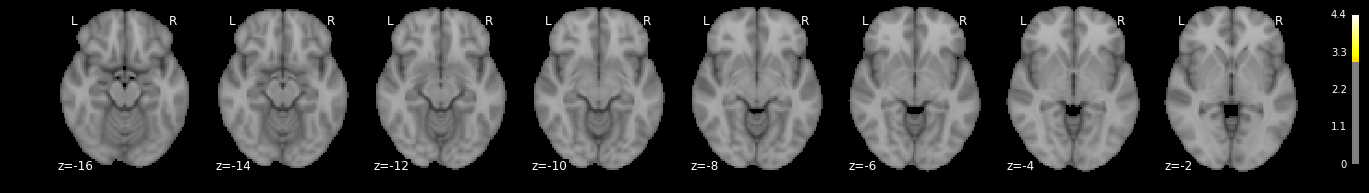

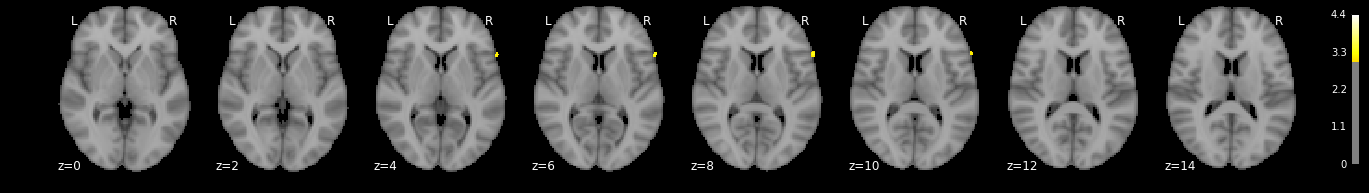

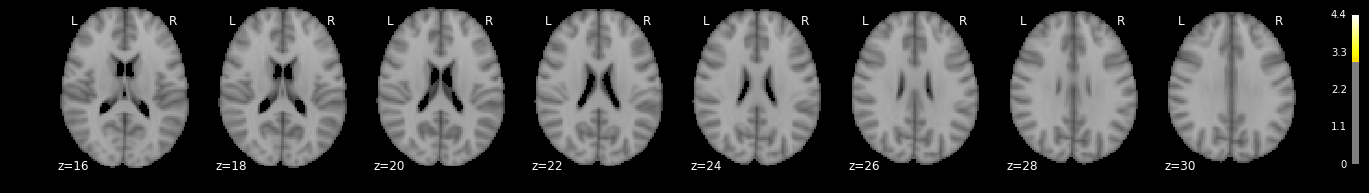

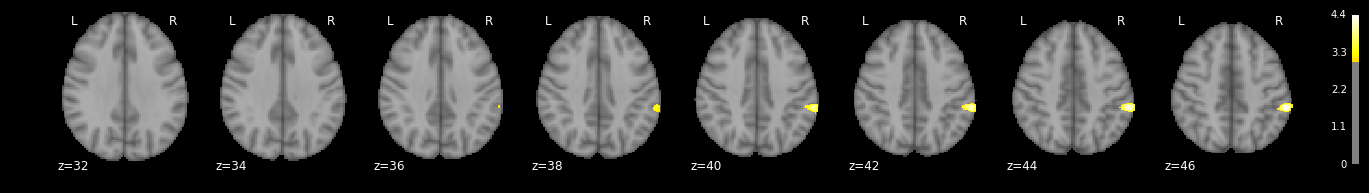

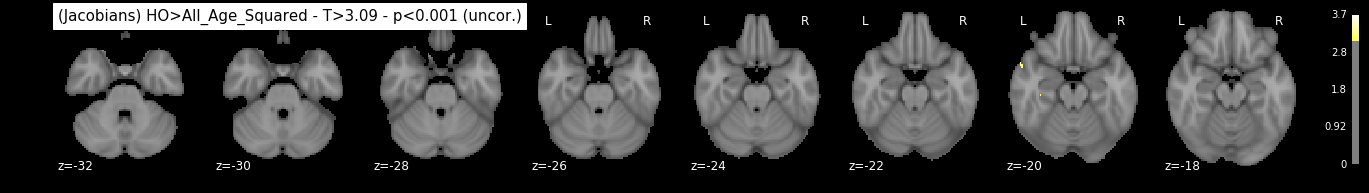

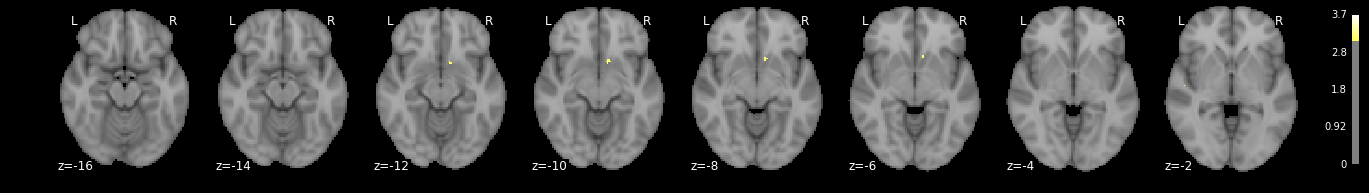

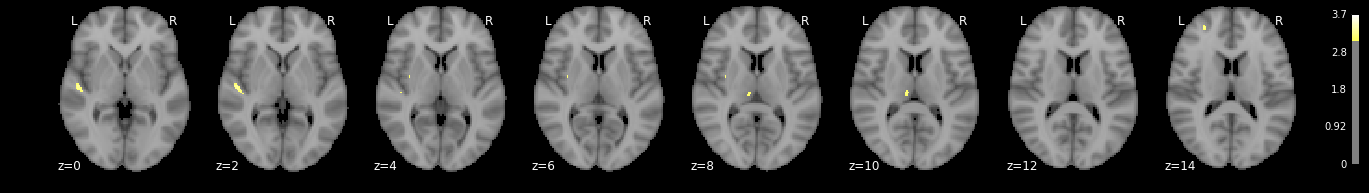

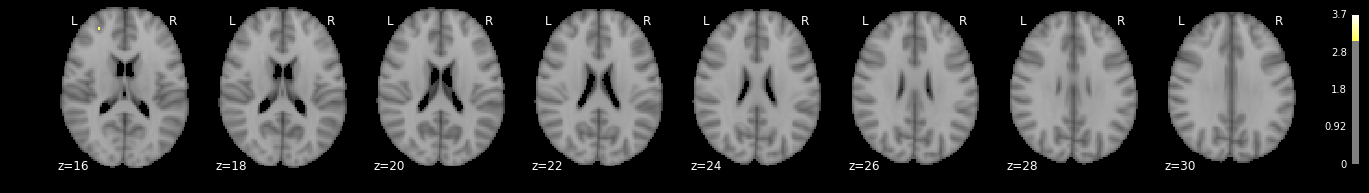

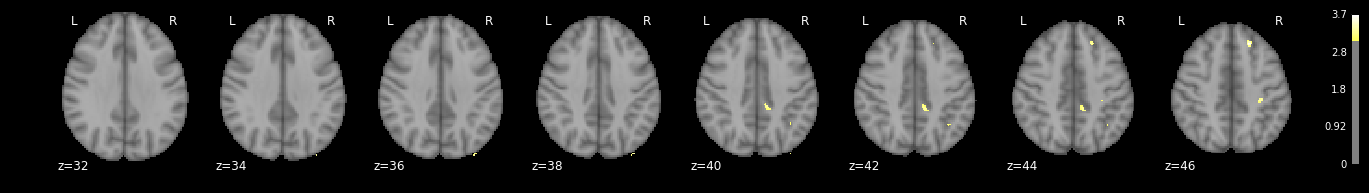

In [5]:
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)

    plot_stat_map(thresholded_map1, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()

In [ ]:
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)

    plot_stat_map(thresholded_map1, threshold=threshold1, row_l=8, start=-90, end=68, step=2, axis='y',
                  title= '(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()

/home/grg/spm/analysis_20161219/MD_pred_wo_ventvol/estimatecontrasts/spmT_0006.nii
Saving to... /tmp/tmpa01ykY.png
/home/grg/spm/analysis_20161219/MD_pred_wo_ventvol/estimatecontrasts/spmT_0007.nii
Saving to... /tmp/tmpuysfoQ.png
/home/grg/spm/analysis_20161219/MD_pred_wo_ventvol/estimatecontrasts/spmT_0008.nii
Saving to... /tmp/tmpyaetWf.png
/home/grg/spm/analysis_20161219/MD_pred_wo_ventvol/estimatecontrasts/spmT_0009.nii
Saving to... /tmp/tmpI8s8sE.png
/home/grg/spm/analysis_20161219/MD_pred_wo_ventvol/estimatecontrasts/spmT_0010.nii


In [ ]:
plot_stat_map('/tmp/r_map.nii.gz', start=-32, end=32, step=2)